In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install patool

     |████████████████████████████████| 77 kB 3.3 MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/nftt2048hop512bins128.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/nftt2048hop512bins128.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/nftt2048hop512bins128.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/nftt2048hop512bins128.rar extracted to `/content'.


'/content'

In [ ]:

"""
Authors : Rayane KADEM
In This program we use transfer learning with a pretrained vgg16model CNN model. We set the last 4
layers of the convolutional block to be re-trained, and we add 3 fully connected layers for the 
classifciation block. Vgg16 was trained previously on the well known ImageNet dataset. 
The presented architecture is inspired from a work of transfer learning for the task of writer 
identification with handwritten documents and yielded very promessing results. Which led us to test it
on the matter at hand.
"""

# Importing the required libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
#import argparse
import keras
from keras.layers import Flatten, Dense, Dropout, Conv2D, Activation ,MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from fetch_training_dataset_tqdm import prep_data_images


In [ ]:
data = prep_data_images()
#data.prep_data("/content/data/chroma_cqt",None)
data.prep_data("/content/data/chroma_stft",None)

  0%|          | 0/10 [00:00<?, ?it/s]

metal



 10%|█         | 1/10 [00:00<00:05,  1.58it/s]

classical



 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

country



 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

disco



 40%|████      | 4/10 [00:02<00:03,  1.60it/s]

reggae



 50%|█████     | 5/10 [00:03<00:03,  1.60it/s]

hiphop



 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

rock



 70%|███████   | 7/10 [00:04<00:01,  1.62it/s]

pop



 80%|████████  | 8/10 [00:04<00:01,  1.62it/s]

blues



 90%|█████████ | 9/10 [00:05<00:00,  1.62it/s]

jazz



100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


In [ ]:
width,height,dimenstion = data.Xval[0].shape

In [ ]:
width,height,dimenstion 

(288, 432, 3)

# Transfer learning model with tqdm





In [ ]:

# Defining the  model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "transfer_learning_vgg16_model_adam_chroma_stft"
        #self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        #self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the model :
        """
        # Defining the input layer
        
        model = Sequential()

        vggmodel=VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(width,height,dimenstion), pooling=None)
        
        # Take all weights of imagenet dataset except for last four layers
        for layer in vggmodel.layers[:-4]: 
            layer.trainable = False 
            
        x = vggmodel.output
        x = Flatten()(x)
        x = Dense(512, activation="relu")(x)
        x = Dropout(0.5)(x)
        x = Dense(128, activation="elu")(x)
        predictions = Dense(10, activation="softmax")(x)

        # creating the final model 
        model = Model( vggmodel.input, predictions)

        # Compiling the model
        self.model = model
        
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss = "categorical_crossentropy", metrics=['accuracy'])
        return vggmodel,x
    def train_model(self,data, epochs=10):
        # Training the model
        
        self.model_history = self.model.fit(data.Xtrain,data.ytrain, epochs=epochs,validation_data=(data.Xval,data.yval), shuffle=True)
        
    def save_model(self):
        """
        This function is used to save the model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, Xtest,ytest):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(Xtest,ytest)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        #plt.savefig(self.model_history_path_acc)
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"_history_acc.png")
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        #plt.savefig(self.model_history_path_loss)
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"_history_loss.png")
        plt.show()
        

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, Xtest,ytest, classes=data.classes):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(Xtest)
        # Plot the confusion matrix
        y_parse = np.argmax(ytest, axis=1)
        cm = confusion_matrix(y_parse, predictions)
        #if classes is None:
        #    classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(10)
        plt.xticks(tick_marks,classes,  rotation=45)
        plt.yticks(tick_marks,classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)


        



Epoch 1/50
22/22 [==============================] - 18s 798ms/step - loss: 2.4885 - accuracy: 0.1229 - val_loss: 2.1768 - val_accuracy: 0.2500
Epoch 2/50
22/22 [==============================] - 17s 779ms/step - loss: 2.2080 - accuracy: 0.1886 - val_loss: 2.0097 - val_accuracy: 0.2900
Epoch 3/50
22/22 [==============================] - 17s 781ms/step - loss: 1.9993 - accuracy: 0.2743 - val_loss: 1.8978 - val_accuracy: 0.2800
Epoch 4/50
22/22 [==============================] - 17s 779ms/step - loss: 1.8179 - accuracy: 0.3571 - val_loss: 1.8187 - val_accuracy: 0.3100
Epoch 5/50
22/22 [==============================] - 17s 783ms/step - loss: 1.6966 - accuracy: 0.4071 - val_loss: 1.7359 - val_accuracy: 0.3500
Epoch 6/50
22/22 [==============================] - 17s 783ms/step - loss: 1.5652 - accuracy: 0.4729 - val_loss: 1.6883 - val_accuracy: 0.3700
Epoch 7/50
22/22 [==============================] - 17s 784ms/step - loss: 1.4363 - accuracy: 0.5171 - val_loss: 1.6486 - val_accuracy: 0.3800

FileNotFoundError: ignored

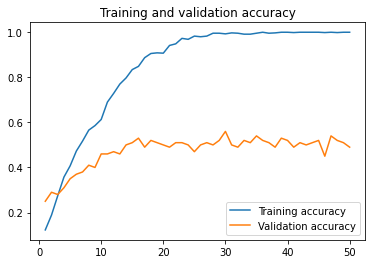

In [ ]:
for i in range(1):
    
    # Fetch the training and test dataset
    
    # Create the  model
    model = CNNModel()
    
    # Build the  model
    vgg16model, model_features = model.build_model()
    # Train the  model
    model.train_model(data, epochs=50)
    
    # Save the  model
    #model.save_model()

    # Evaluate  model
    model.evaluate_model(data.Xtest,data.ytest)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(data.Xtest,data.ytest,data.classes)


FileNotFoundError: ignored

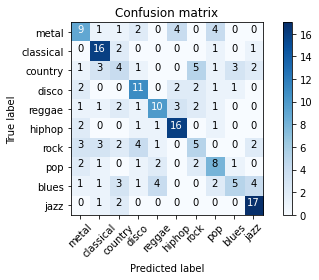

In [ ]:
 model.plot_confusion_matrix(data.Xtest,data.ytest,data.classes)

## SVM with CNN features

In [ ]:
extractor = Model( vgg16model.input, model_features)

In [ ]:
#extractor = Model(model.model.input, model.model.layers[-2].output)

In [ ]:
Xtrain = np.concatenate((data.Xtrain,data.Xval), axis=0)

In [ ]:
# Feature extraction
xapp = extractor.predict(Xtrain) # training CNN features vector
xtest = extractor.predict(data.Xtest) # testing CNN features vector

In [ ]:
# Normalisation
from sklearn import preprocessing 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
xapp_n = min_max_scaler.fit_transform(xapp)
xtest_n = min_max_scaler.fit_transform(xtest)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
# transform labels to parse
yT  = np.argwhere(np.concatenate((data.ytrain,data.yval),axis=0))
yTr = yT[:,1] 
yT  = np.argwhere(data.ytest)
yTs = yT[:,1] 

In [ ]:
# function to find best accuracy and its related parameters Gamma and C
def best_value(tmbr,G,C):
  acc= tmbr.max()
  result = np.where(tmbr_all == acc)
  coor = list(zip(result[0], result[1]))
  g=G[coor[0][0]]
  c= C[coor[0][1]]
  return acc,g,c

In [ ]:
#Grid search

# Set a range for C values
C2 = np.array([100,200,500,1000,2015])
C1 = np.arange(1, 40,2)
C=np.append(C1,C2)
m=len(C)
# Set a range for Gamma values
G1 = np.array([0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,1])  #
G2 = np.arange(2, 6, 1)  
G=np.append(G1,G2) 
n=len(G)

i=0
j=0
tmbr_all = np.zeros((n,m))
for C_value in C:
    for g_value in G:
    
        clf = svm.SVC(kernel='rbf', C=C_value, gamma=g_value)
        clf.fit(xapp_n, yTr)
        predicted = clf.predict(xtest_n)
        tmbr = accuracy_score(predicted,yTs)
        print(tmbr*100, C_value, g_value)
        tmbr_all[i,j] = tmbr
        i=i+1
    i=0
    j=j+1
#best_value(tmbr_all,G,C)
accuracy= tmbr_all.max()


8.5 1 1e-05
8.5 1 0.0001
23.0 1 0.001
50.5 1 0.01
48.5 1 0.1
49.0 1 0.2
45.5 1 0.5
28.499999999999996 1 1.0
16.0 1 2.0
13.0 1 3.0
11.0 1 4.0
12.0 1 5.0
8.5 3 1e-05
8.5 3 0.0001
50.0 3 0.001
49.0 3 0.01
50.0 3 0.1
52.5 3 0.2
45.0 3 0.5
28.000000000000004 3 1.0
16.0 3 2.0
14.000000000000002 3 3.0
12.5 3 4.0
12.5 3 5.0
8.5 5 1e-05
9.5 5 0.0001
51.0 5 0.001
49.0 5 0.01
51.0 5 0.1
52.5 5 0.2
44.0 5 0.5
28.000000000000004 5 1.0
16.0 5 2.0
14.000000000000002 5 3.0
12.5 5 4.0
12.5 5 5.0
8.5 7 1e-05
17.5 7 0.0001
51.0 7 0.001
49.0 7 0.01
50.0 7 0.1
52.5 7 0.2
44.0 7 0.5
28.000000000000004 7 1.0
16.0 7 2.0
14.000000000000002 7 3.0
12.5 7 4.0
12.5 7 5.0
8.5 9 1e-05
20.5 9 0.0001
50.5 9 0.001
49.5 9 0.01
50.5 9 0.1
52.0 9 0.2
44.0 9 0.5
28.000000000000004 9 1.0
16.0 9 2.0
14.000000000000002 9 3.0
12.5 9 4.0
12.5 9 5.0
8.5 11 1e-05
28.000000000000004 11 0.0001
50.0 11 0.001
49.0 11 0.01
50.5 11 0.1
52.0 11 0.2
44.0 11 0.5
28.000000000000004 11 1.0
16.0 11 2.0
14.000000000000002 11 3.0
12.5 11 4.0
1

In [ ]:
acc, g,c = best_value(tmbr_all,G,C)

In [ ]:
print("accuracy:", acc)
print("best params : gamma = ",g,",C =",c)

accuracy: 0.525
best params : gamma =  0.0001 ,C = 2015


SVM with CNN features did not very much serve our purpose and gave similar values to the fully connected classification block of our CNN model. Thus we might use it again with other features extraction methods. 

# CNN 2 Layers with TQDM

In [ ]:

# Defining the black box model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "CNN3layers_model_RMSprop_crossEn_orginal_size"
        self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the black box model :
        """
        # Defining the input layer
        
        model = Sequential()

        #Adding the CNN layers along with some drop outs and maxpooling
        model.add(Conv2D(64, (3,3), activation ='relu', input_shape = (width, height, dimenstion)))
        model.add(MaxPooling2D(pool_size = (2,2)))


        model.add(Conv2D(32, (5,5),strides=(1,1) , activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (3,3)))
        
        model.add(Conv2D(32, (3,3),strides=(2,2) , activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (2,2)))

        model.add(Flatten())

        
        #Adding the dense layers
        model.add(Dense(256, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(124, activation = 'relu'))
        #final output layer with 10 predictions to be made
        model.add(Dense(10, activation = 'softmax'))
    
        
        
        # Compiling the model
        self.model = model
        model.summary()
        self.model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

        
        
    def train_model(self,data, epochs=10):
        """
        This function is used to train the black box model :
        """
        # Training the model
        """
        callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=3,
        min_lr=0.000001
      )"""
        self.model_history = self.model.fit(data.Xtrain,data.ytrain, epochs=epochs,validation_data=(data.Xval,data.yval), shuffle=True)
        
    def save_model(self):
        """
        This function is used to save the black box model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, Xtest,ytest):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(Xtest,ytest)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.savefig(self.model_history_path_acc)
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.savefig(self.model_history_path_loss)
        plt.show()
        
    def predict_class(self, spectrogram_image):
        """
        This function is used to predict the class of the spectrogram image :
        """
        # Predict the class
        prediction = self.model.predict(spectrogram_image)
        return np.argmax(prediction)

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, Xtest,ytest, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(Xtest)
        # Plot the confusion matrix
        y_parse = np.argmax(ytest, axis=1)
        cm = confusion_matrix(y_parse, predictions)
        #if classes is None:
        #    classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(10)
        classes = ["rock","hiphop","country","jazz","metal","blues","reggae","disco","Classical","pop"]
        plt.xticks(tick_marks,classes,  rotation=45)
        plt.yticks(tick_marks,classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)


        



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 139, 211, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 70, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 17, 32)      

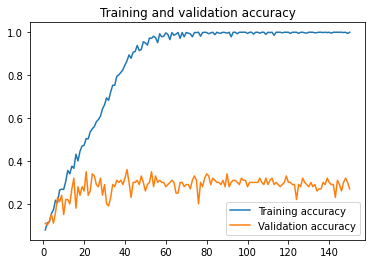

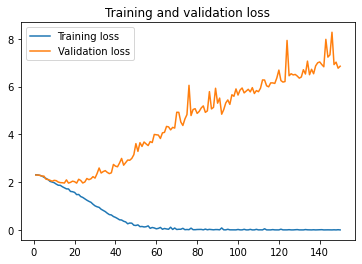

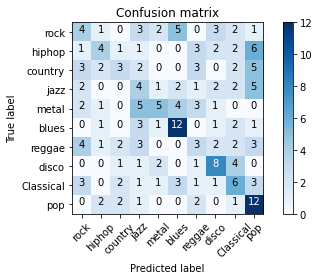

acc 0.305


In [ ]:
for i in range(1):
    
    # Fetch the training and test dataset
    
    # Create the  model
    model = CNNModel()
    
    # Build the  model
    model.build_model()
    # Train the  model
    model.train_model(data, epochs=150)
    
    # Save the  model
    model.save_model()

    # Evaluate  model
    model.evaluate_model(data.Xtest,data.ytest)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(data.Xtest,data.ytest)


#Frequency Model

In [ ]:

# Defining the black box model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "frequency_model_Adam_crossEn_orginal_Chroma_stft"
        self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the black box model :
        """
        # Defining the input layer
        
        model = Sequential()

        #Adding the CNN layers along with some drop outs and maxpooling
        model.add(Conv2D(32, (4,1), activation ='relu', input_shape = (width, height, dimenstion)))
        model.add(MaxPooling2D(pool_size = (1,height)))
        model.add(Flatten())
        model.add(Dense(10, activation = 'softmax'))
    
        
        
        # Compiling the model
        self.model = model
        model.summary()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
        return 
        
        
    def train_model(self,data, epochs=10):
        """
        This function is used to train the black box model :
        """
        # Training the model
        """
        callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=3,
        min_lr=0.000001
      )"""
        self.model_history = self.model.fit(data.Xtrain,data.ytrain, epochs=epochs,validation_data=(data.Xval,data.yval), shuffle=True)
        
    def save_model(self):
        """
        This function is used to save the black box model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, Xtest,ytest):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(Xtest,ytest)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        #plt.savefig(self.model_history_path_acc)
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        #plt.savefig(self.model_history_path_loss)
        plt.show()
        
    def predict_class(self, spectrogram_image):
        """
        This function is used to predict the class of the spectrogram image :
        """
        # Predict the class
        prediction = self.model.predict(spectrogram_image)
        return np.argmax(prediction)

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, Xtest,ytest, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(Xtest)
        # Plot the confusion matrix
        y_parse = np.argmax(ytest, axis=1)
        cm = confusion_matrix(y_parse, predictions)
        #if classes is None:
        #    classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(10)
        classes = ["rock","hiphop","country","jazz","metal","blues","reggae","disco","Classical","pop"]
        plt.xticks(tick_marks,classes,  rotation=45)
        plt.yticks(tick_marks,classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)


        



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 285, 432, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 285, 1, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 9120)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                91210     
                                                                 
Total params: 91,626
Trainable params: 91,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
22/22 [==============================] - 3s 134ms/step - loss: 2.5053 - accuracy: 0.0843 - val_loss: 2.3

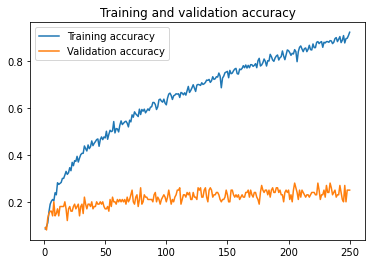

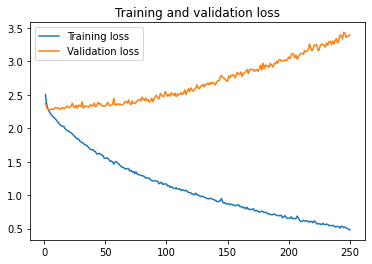

FileNotFoundError: ignored

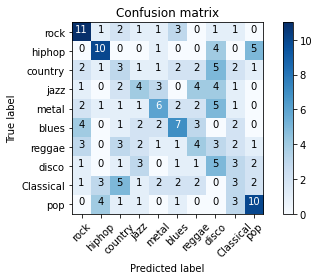

In [ ]:
for i in range(1):
    
    # Fetch the training and test dataset
    
    # Create the  model
    model = CNNModel()
    
    # Build the  model
    model.build_model()
    # Train the  model
    model.train_model(data, epochs=250)
    
    # Save the  model
    #model.save_model()

    # Evaluate  model
    model.evaluate_model(data.Xtest,data.ytest)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(data.Xtest,data.ytest)


In [ ]:
x= model.model.layers[-2].output
freq_model = Model(model.model.input,x)
Xtest_freq = freq_model.predict(data.Xtest)
Xtrain_freq = freq_model.predict(data.Xtrain)
Xval_freq = freq_model.predict(data.Xval)

# Time Model

In [ ]:
width, height, dimenstion


(288, 432, 3)

In [ ]:
# Defining the black box model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "time_model2_Adam_crossEn_orginal_size_default_chroma_stft"
        self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the black box model :
        """
        # Defining the input layer
        
        model = Sequential()

        #Adding the CNN layers along with some drop outs and maxpooling
        model.add(Conv2D(32, (1,4), activation ='relu', input_shape = (width, height, dimenstion)))
        model.add(MaxPooling2D(pool_size = (width,1)))
        model.add(Flatten())
        model.add(Dense(10, activation = 'softmax'))
    
        
        
        # Compiling the model
        self.model = model
        model.summary()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
        
        
        
    def train_model(self,data, epochs=10):
        """
        This function is used to train the black box model :
        """
        # Training the model
        """
        callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=3,
        min_lr=0.000001
      )"""
        self.model_history = self.model.fit(data.Xtrain,data.ytrain, epochs=epochs,validation_data=(data.Xval,data.yval), shuffle=True)
        
    def save_model(self):
        """
        This function is used to save the black box model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, Xtest,ytest):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(Xtest,ytest)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        #plt.savefig(self.model_history_path_acc)
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        #plt.savefig(self.model_history_path_loss)
        plt.show()
        
    def predict_class(self, spectrogram_image):
        """
        This function is used to predict the class of the spectrogram image :
        """
        # Predict the class
        prediction = self.model.predict(spectrogram_image)
        return np.argmax(prediction)

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, Xtest,ytest, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(Xtest)
        # Plot the confusion matrix
        y_parse = np.argmax(ytest, axis=1)
        cm = confusion_matrix(y_parse, predictions)
        #if classes is None:
        #    classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(10)
        #classes = ["rock","hiphop","country","jazz","metal","blues","reggae","disco","Classical","pop"]
        plt.xticks(tick_marks,classes,  rotation=45)
        plt.yticks(tick_marks,classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        #plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)


        



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 288, 429, 32)      416       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 429, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 13728)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                137290    
                                                                 
Total params: 137,706
Trainable params: 137,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
22/22 [==============================] - 3s 116ms/step - loss: 2.3583 - accuracy: 0.0914 - val_loss: 2

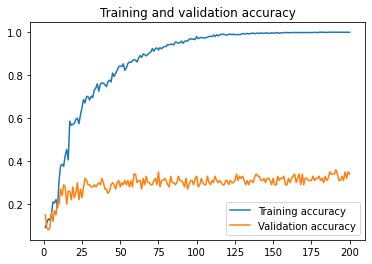

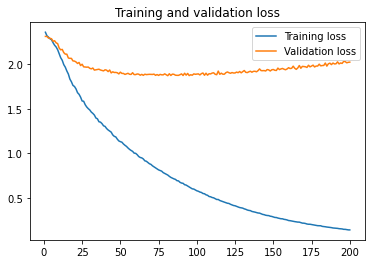

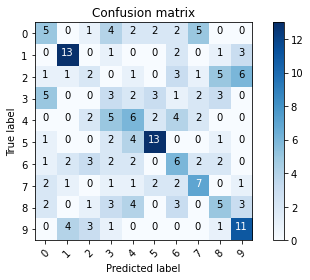

acc 0.355


In [ ]:
for i in range(1):
    
    # Fetch the training and test dataset
    
    # Create the  model
    model = CNNModel()
    
    # Build the  model
    model.build_model()
    # Train the  model
    model.train_model(data, epochs=200)
    
    # Save the  model
    #model.save_model()

    # Evaluate  model
    model.evaluate_model(data.Xtest,data.ytest)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(data.Xtest,data.ytest)

In [ ]:
x= model.model.layers[-2].output
time_model = Model(model.model.input,x)
Xtest_time = time_model.predict(data.Xtest)
Xtrain_time = time_model.predict(data.Xtrain)
Xval_time = time_model.predict(data.Xval)

In [ ]:
Xtrain_time.mean()

0.17206602

# Hybrid Model freq/time

In [ ]:
Xtrain_freq.shape

(700, 6848)

## Dimension reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
# Reduce dimensionality with PCA

# For time 
pca = PCA(n_components=300)
pca.fit(Xtrain_time)
XtrainT_time = pca.transform(Xtrain_time)
XtestT_time = pca.transform(Xtest_time)
XvalT_time = pca.transform(Xval_time)


In [ ]:
# For frequency
pca = PCA(n_components=500)
pca.fit(Xtrain_freq)
XtrainT_freq = pca.transform(Xtrain_freq)
XtestT_freq = pca.transform(Xtest_freq)
XvalT_freq = pca.transform(Xval_freq)

## mix two features vectors

In [ ]:
XtestT_time.shape

(200, 4576)

In [ ]:
# drop out 50%
XtestT_freq = Xtest_freq[:,0::2]
XtrainT_freq = Xtrain_freq[:,0::2]
XvalT_freq = Xval_freq[:,0::2]

In [ ]:
# drop out 66% 
XtestT_time= Xtest_time[:,0::3]
XtrainT_time = Xtrain_time[:,0::3]
XvalT_time = Xval_time[:,0::3]

In [ ]:
Xtest_hybrid = np.concatenate((Xtest_freq,Xtest_time),axis=1)
Xtrain_hybrid = np.concatenate((Xtrain_freq,Xtrain_time),axis=1)
Xval_hybrid = np.concatenate((Xval_freq,Xval_time),axis=1)


In [ ]:
Xtest_hybrid.max()

2.2079792

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
#min_max_scaler= StandardScaler()
# Scaled feature 
Xtest_hybrid = min_max_scaler.fit_transform(Xtest_hybrid)
Xtrain_hybrid = min_max_scaler.fit_transform(Xtrain_hybrid)
Xval_hybrid = min_max_scaler.fit_transform(Xval_hybrid)

In [ ]:
length = Xtest_hybrid.shape[1]

In [ ]:
length

22848

In [ ]:
# Defining the black box model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "Hybrid_Adam_crossEn_orginal_sizeçchroma_stft"
        self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the black box model :
        """
        # Defining the input layer
        
        model = Sequential()
        model.add(Dense(256, input_shape=(length,)))
        model.add(Dropout(0.3))
        #Adding the dense layers
        model.add(Dense(124, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation = 'relu'))
        #final output layer with 10 predictions to be made
        model.add(Dense(10, activation = 'softmax'))

        
        
        # Compiling the model
        self.model = model
        model.summary()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
        
        
        
    def train_model(self,Xtrain,ytrain,Xval,yval, epochs=10):
        """
        This function is used to train the black box model :
        """
        # Training the model
        """
        callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=3,
        min_lr=0.000001
      )"""
        self.model_history = self.model.fit(Xtrain,ytrain, epochs=epochs,validation_data=(Xval,yval), shuffle=True)
        
    def save_model(self):
        """
        This function is used to save the black box model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, Xtest,ytest):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(Xtest,ytest)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        #plt.savefig(self.model_history_path_acc)
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        #plt.savefig(self.model_history_path_loss)
        plt.show()
        
    def predict_class(self, spectrogram_image):
        """
        This function is used to predict the class of the spectrogram image :
        """
        # Predict the class
        prediction = self.model.predict(spectrogram_image)
        return np.argmax(prediction)

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, Xtest,ytest, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(Xtest)
        # Plot the confusion matrix
        y_parse = np.argmax(ytest, axis=1)
        cm = confusion_matrix(y_parse, predictions)
        #if classes is None:
        #    classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(10)
        #classes = ["rock","hiphop","country","jazz","metal","blues","reggae","disco","Classical","pop"]
        plt.xticks(tick_marks,classes,  rotation=45)
        plt.yticks(tick_marks,classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        #plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)


        



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               5849344   
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 124)               31868     
                                                                 
 dropout_10 (Dropout)        (None, 124)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8000      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 5,889,862
Trainable params: 5,889,862
N

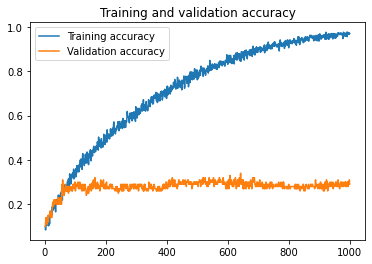

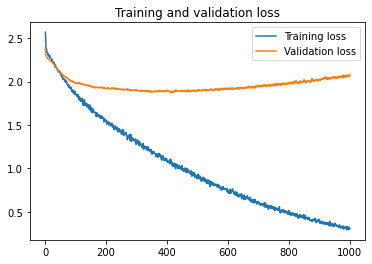

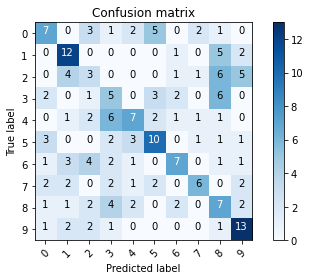

acc 0.385


In [ ]:
for i in range(1):
    
    # Fetch the training and test dataset
    
    # Create the  model
    model = CNNModel()
    
    # Build the  model
    model.build_model()
    # Train the  model
    model.train_model(Xtrain_hybrid,data.ytrain,Xval_hybrid,data.yval, epochs=1000)
    
    # Save the  model
    #model.save_model()

    # Evaluate  model
    model.evaluate_model(Xtest_hybrid,data.ytest)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(Xtest_hybrid,data.ytest)

# GEN mode CNN Model


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/MLspectrogram.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/MLspectrogram.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/MLspectrogram.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/MLspectrogram.rar extracted to `/content'.


'/content'

In [ ]:
  
"""
Authors : Rayane KADEM
This programm is used to create a class that represents a black box model using tensorflox framework. :
    - The model conssists of  CNN layer, Fully connected layers and a softmax layer :
    - The CNN is used to extract features from spectrogram images and it contains :
        - 
        -
    - The output of CNN is flattened and fed into a fully connected layer with .. neurons
    - The output of fully connected layer is fed into a softmax layer with 10 neurons
"""

# Importing the required libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from fetch_training_dataset2 import fetch_spectogram_dataset
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
#import argparse
import keras
from keras.layers import Flatten, Dense, Dropout, Conv2D, Activation ,MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from keras.layers import LeakyReLU

# Defining the black box model
class CNNModel:
    def __init__(self):
        self.model = None
        self.model_name = "2layers_CNN_model_mlSpectrogram"
        self.model_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + ".h5"
        self.model_weights_path = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+  self.model_name + "_weights.h5"
        self.model_history_path_acc = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_acc.png"
        self.model_history_path_loss = "/content/drive/MyDrive/Mymodels_result/" + self.model_name +"/"+ self.model_name + "_history_loss.png"
        
        self.model_history = None
    
    def build_model(self):
        """
        This function is used to create the black box model :
        """
        # Defining the input layer
        
        model = Sequential()

        #Adding the CNN layers along with some drop outs and maxpooling
        model.add(Conv2D(64, (3,3), activation ='relu', input_shape = (217, 334, 3)))
        model.add(MaxPooling2D(pool_size = (2,2)))


        model.add(Conv2D(32, (3,3),strides=(1,1) , activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (2,2)))
        
        model.add(Flatten())

        
        #Adding the dense layers
        model.add(Dense(256, activation = 'relu'))
        model.add(Dropout(0.5))
        model.add(Dense(124, activation = 'relu'))
        #final output layer with 10 predictions to be made
        model.add(Dense(10, activation = 'softmax'))
    
        
        
        # Compiling the model
        self.model = model
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

        
    def train_model(self, train_generator,validation_generator, epochs=10):
        """
        This function is used to train the black box model :
        """
        # Training the model
        self.model_history = self.model.fit(train_generator, epochs=epochs,validation_data=validation_generator, shuffle=True)

        
    def save_model(self):
        """
        This function is used to save the black box model :
        """
        # Save the model
        self.model.save(self.model_path)
        
    def load_model(self):
        """
        This function is used to load the black box model :
        """
        # Load the model
        self.model = tf.keras.models.load_model(self.model_path)
        
    def save_model_weights(self):
        """
        This function is used to save the weights of the black box model :
        """
        # Save the weights
        self.model.save_weights(self.model_weights_path)
    

    def evaluate_model(self, test_generator):
        """
        This function is used to evaluate the black box model :
        """
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(test_generator)
        print("Test loss: ", test_loss)
        print("Test accuracy: ", test_acc)
    
    def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        #define variables
        loss = self.model_history.history['loss']
        val_loss = self.model_history.history['val_loss']
        accuracy = self.model_history.history['accuracy']
        val_accuracy = self.model_history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)
        # Plot the model history
        plt.figure()
        plt.plot(epochs, accuracy, label='Training accuracy')
        plt.plot(epochs, val_accuracy, label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.savefig(self.model_history_path_acc)
        plt.show()

        plt.figure()
        plt.plot(epochs, loss, label='Training loss')
        plt.plot(epochs, val_loss, label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.savefig(self.model_history_path_loss)
        plt.show()
        

    def predict_classes(self, spectrogram_images):
        """
        This function is used to predict the classes of the spectrogram images :
        """
        # Predict the classes
        predictions = self.model.predict(spectrogram_images)
        return np.argmax(predictions, axis=1)

    
    def plot_confusion_matrix(self, test_generator, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(test_generator)
        # Plot the confusion matrix
        cm = confusion_matrix(test_generator.classes, predictions)
        if classes is None:
            classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig("/content/drive/MyDrive/Mymodels_result/"+ self.model_name +"/"+"confusion_matrix.png")
        plt.show()
        acc = np.diag(cm).sum() /cm.sum()
        print("acc",acc)

def main():
    
    # Fetch the training and test dataset
    train_generator = fetch_spectogram_dataset("data/train")
    test_generator =  fetch_spectogram_dataset("data/test")
    validation_generator =  fetch_spectogram_dataset("data/validation")
    # Create the black box model
    model = CNNModel()
    
    # Build the black box model
    model.build_model()
    
    # Train the black box model
    model.train_model(train_generator,validation_generator, epochs=200)

    # Save the black box model
    model.save_model()

    # Evaluate the black box model
    model.evaluate_model(test_generator)

    # Plot the model history
    model.plot_model_history()
    
    # Plot the confusion matrix
    model.plot_confusion_matrix(test_generator)

if __name__ == "__main__":
    main()


Found 700 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
70/70 [==============================] - 6s 77ms/step - loss: 2.3796 - accuracy: 0.0643 - val_loss: 2.2993 - val_accuracy: 0.1000
Epoch 2/200
70/70 [==============================] - 5s 73ms/step - loss: 2.3138 - accuracy: 0.1100 - val_loss: 2.2959 - val_accuracy: 0.1000
Epoch 3/200
70/70 [==============================] - 5s 73ms/step - loss: 2.3013 - accuracy: 0.1200 - val_loss: 2.2832 - val_accuracy: 0.2000
Epoch 4/200
70/70 [==============================] - 5s 74ms/step - loss: 2.3017 - accuracy: 0.1043 - val_loss: 2.2748 - val_accuracy: 0.1400
Epoch 5/200
70/70 [==============================] - 5s 73ms/step - loss: 2.2867 - accuracy: 0.1300 - val_loss: 2.2653 - val_accuracy: 0.2400
Epoch 6/200
70/70 [==============================] - 5s 74ms/step - loss: 2.2706 - accuracy: 0.1186 - val_loss: 2.2506 - val_accuracy: 0.1500
Epoch 7/200
70/70 [==============================] - 5s 75ms/step - loss: 2.2764 - accuracy: 0.1171 - val_loss: 2.2346 - val_accuracy: 0.2800
Epoch 

KeyboardInterrupt: ignored